Number of rows in row_volatility: 428932
Volatility for row 428931: 8958.287455757996
----Fold:0--------start----
epoch 0  | loss: 0.07816 | train_rmspe: 3.76124 | valid_rmspe: 3.87557 |  0:00:51s
epoch 1  | loss: 0.00127 | train_rmspe: 0.71185 | valid_rmspe: 0.81933 |  0:01:42s
epoch 2  | loss: 0.00075 | train_rmspe: 0.62091 | valid_rmspe: 0.6446  |  0:02:35s
epoch 3  | loss: 0.00056 | train_rmspe: 0.58628 | valid_rmspe: 0.5903  |  0:03:30s
epoch 4  | loss: 0.00049 | train_rmspe: 0.33309 | valid_rmspe: 0.34675 |  0:04:25s
epoch 5  | loss: 0.00045 | train_rmspe: 0.37744 | valid_rmspe: 0.37874 |  0:05:22s
epoch 6  | loss: 0.00044 | train_rmspe: 0.34272 | valid_rmspe: 0.34115 |  0:06:23s
epoch 7  | loss: 0.0004  | train_rmspe: 0.291   | valid_rmspe: 0.29345 |  0:07:21s
epoch 8  | loss: 0.00039 | train_rmspe: 0.29837 | valid_rmspe: 0.27795 |  0:08:17s
epoch 9  | loss: 0.00038 | train_rmspe: 0.336   | valid_rmspe: 0.29076 |  0:09:37s
epoch 10 | loss: 0.00037 | train_rmspe: 0.28361 | valid_

epoch 7  | loss: 0.0004  | train_rmspe: 0.3011  | valid_rmspe: 0.29866 |  0:07:32s
epoch 8  | loss: 0.0004  | train_rmspe: 0.30664 | valid_rmspe: 0.30353 |  0:08:29s
epoch 9  | loss: 0.00039 | train_rmspe: 0.27601 | valid_rmspe: 0.27342 |  0:09:38s
epoch 10 | loss: 0.00038 | train_rmspe: 0.30789 | valid_rmspe: 0.30285 |  0:10:55s
epoch 11 | loss: 0.00037 | train_rmspe: 0.27946 | valid_rmspe: 0.27826 |  0:12:12s
epoch 12 | loss: 0.00036 | train_rmspe: 0.28669 | valid_rmspe: 0.28754 |  0:13:28s
epoch 13 | loss: 0.00036 | train_rmspe: 0.28909 | valid_rmspe: 0.28951 |  0:14:45s
epoch 14 | loss: 0.00036 | train_rmspe: 0.26173 | valid_rmspe: 0.2637  |  0:16:02s
epoch 15 | loss: 0.00035 | train_rmspe: 0.26473 | valid_rmspe: 0.26523 |  0:17:19s
epoch 16 | loss: 0.00035 | train_rmspe: 0.27165 | valid_rmspe: 0.27408 |  0:18:36s
epoch 17 | loss: 0.00035 | train_rmspe: 0.25827 | valid_rmspe: 0.2583  |  0:19:54s
epoch 18 | loss: 0.00034 | train_rmspe: 0.26268 | valid_rmspe: 0.26707 |  0:21:12s
epoc

epoch 2  | loss: 0.00122 | train_rmspe: 1.16433 | valid_rmspe: 1.41719 |  0:02:41s
epoch 3  | loss: 0.0008  | train_rmspe: 1.10695 | valid_rmspe: 1.19549 |  0:03:37s
epoch 4  | loss: 0.00076 | train_rmspe: 0.63449 | valid_rmspe: 0.68802 |  0:04:31s
epoch 5  | loss: 0.00064 | train_rmspe: 1.27964 | valid_rmspe: 1.77978 |  0:05:30s
epoch 6  | loss: 0.00067 | train_rmspe: 0.5907  | valid_rmspe: 0.70799 |  0:06:31s
epoch 7  | loss: 0.00064 | train_rmspe: 2.13969 | valid_rmspe: 2.54232 |  0:07:29s
epoch 8  | loss: 0.00055 | train_rmspe: 0.83019 | valid_rmspe: 0.72159 |  0:08:27s
epoch 9  | loss: 0.00058 | train_rmspe: 1.17264 | valid_rmspe: 0.96848 |  0:09:37s
epoch 10 | loss: 0.00057 | train_rmspe: 1.34462 | valid_rmspe: 0.97422 |  0:10:54s
epoch 11 | loss: 0.00048 | train_rmspe: 0.93149 | valid_rmspe: 0.72165 |  0:12:12s
epoch 12 | loss: 0.00047 | train_rmspe: 0.56049 | valid_rmspe: 0.45012 |  0:13:30s
epoch 13 | loss: 0.00055 | train_rmspe: 0.6012  | valid_rmspe: 0.6523  |  0:14:47s
epoc

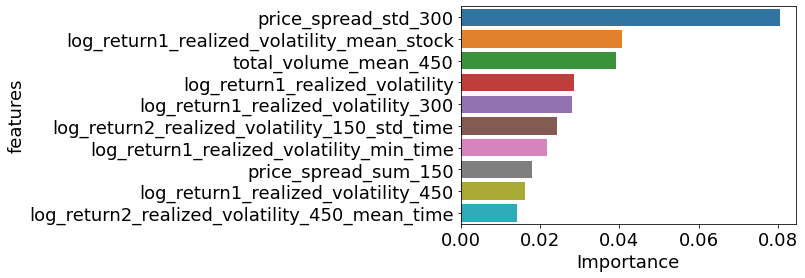

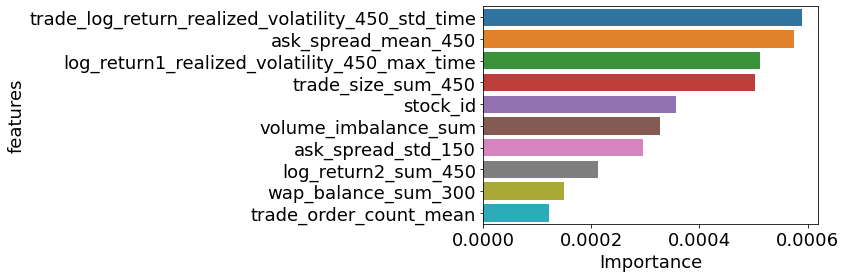

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
import torch
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.metrics import Metric
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from sklearn.svm import SVR
from pathlib import Path
from datetime import datetime  # For generating unique filenames

# Suppress warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)

# Set up random seed
SEED = 4011

def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(SEED)
        torch.cuda.manual_seed_all(SEED)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# Apply the random seed
random_seed(SEED)

# Load the training data
train = pd.read_pickle(r"C:\Users\1155177174\Downloads\new_train.pkl")

# Fill NA with mean for all columns except the first four
for col in train.columns.to_list()[4:]:
    train[col] = train[col].fillna(train[col].mean())

# Standardize the data (all columns except 'row_id', 'target', 'time_id', 'stock_id')
scales = train.drop(['row_id', 'target', 'time_id', 'stock_id'], axis=1).columns.to_list()
scaler = StandardScaler()
scaler.fit(train[scales])
scaler_name = "scaler.pkl"

# Save the scaler model for future use
with open(scaler_name, 'wb') as f:
    pickle.dump(scaler, f)

# Assign numerical labels to 'stock_id' using LabelEncoder
le = LabelEncoder()
le.fit(train["stock_id"])
train["stock_id"] = le.transform(train["stock_id"])

# Save the LabelEncoder for future use
with open('stock_id_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Cross-validation function to create folds
def create_folds(data, num_splits, target):
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(data))))
    data.loc[:, "bins"] = pd.cut(data[target], bins=num_bins, labels=False)
    kf = StratifiedKFold(n_splits=num_splits)
    for fold, (train_idx, valid_idx) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[valid_idx, 'kfold'] = fold
    data = data.drop("bins", axis=1)
    return data

# Apply 5-fold cross-validation
train = create_folds(train, 5, "target")

# Root Mean Square Percentage Error (RMSPE) calculation function
def rmspe(y_true, y_pred):
    if (y_true == 0).any():
        raise ValueError("RMSPE cannot be used with zero values in targets.")
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Custom RMSPE metric class for TabNet
class RMSPE(Metric):
    def __init__(self):
        self._name = "rmspe"
        self._maximize = False

    def __call__(self, y_true, y_score):
        return rmspe(y_true, y_score)

# TabNet parameter configuration
tabnet_params = dict(
    n_d = 32,
    n_a = 32,
    n_steps = 3,
    gamma = 1.3,
    lambda_sparse = 0,
    optimizer_fn = optim.Adam,
    optimizer_params = dict(lr=1e-2, weight_decay=1e-5),
    mask_type = "entmax",
    scheduler_params = dict(
        mode="min", patience=5, min_lr=1e-5, factor=0.9),
    scheduler_fn = ReduceLROnPlateau,
    seed = SEED,
    cat_dims=[len(le.classes_)],
    cat_emb_dim=[10],
    cat_idxs=[-1]
)

# SVM parameter configuration for GridSearchCV
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Maximum number of epochs set to 50
max_epochs = 50

# Initialize variables to store best results
best_scores = []
best_model = None
best_rmspe = float('inf')

# Calculate row volatility (standard deviation) across features except 'row_id', 'target', etc.
row_volatility = train.drop(['row_id', 'target', 'time_id', 'stock_id', 'kfold'], axis=1).std(axis=1)

# Debugging step: Check the number of rows in row_volatility
print(f"Number of rows in row_volatility: {len(row_volatility)}")

# Use a valid index to avoid out-of-bounds error
valid_index = min(428932, len(row_volatility) - 1)
print(f"Volatility for row {valid_index}: {row_volatility.iloc[valid_index]}")

# Cross-validation over the 5 folds
for fold in range(5):
    traindf = train[train["kfold"] != fold].reset_index(drop=True)
    validdf = train[train["kfold"] == fold].reset_index(drop=True)

    # Prepare training and validation data, normalize except 'stock_id'
    X_train = traindf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).values
    X_train = scaler.transform(X_train)
    traindf_scaled = pd.DataFrame(X_train)
    traindf_scaled['stock_id'] = traindf['stock_id']
    X_train = traindf_scaled.values
    y_train = traindf['target'].values.reshape(-1, 1)

    X_valid = validdf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).values
    X_valid = scaler.transform(X_valid)
    validdf_scaled = pd.DataFrame(X_valid)
    validdf_scaled['stock_id'] = validdf['stock_id']
    X_valid = validdf_scaled.values
    y_valid = validdf['target'].values.reshape(-1, 1)

    # Calculate inverse square weights for training data
    y_weight = 1 / np.square(traindf["target"])

    print(f"----Fold:{fold}--------start----")

    # Train TabNet model
    clf = TabNetRegressor(**tabnet_params)

    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=[RMSPE],
        max_epochs=max_epochs,
        patience=10,
        batch_size=2048,  # Adjusted batch size
        virtual_batch_size=256,
        num_workers=4,
        drop_last=False,
        weights=y_weight,
        loss_fn=nn.L1Loss()
    )

    # Generate a unique filename with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    saving_path_name = f"tabnet_model_test_{fold}_{timestamp}.zip"

    clf.save_model(saving_path_name)

    # SVM training with GridSearchCV
    X_train_svm = scaler.transform(traindf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).values)
    X_valid_svm = scaler.transform(validdf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).values)

    svr = SVR()
    svm_grid = GridSearchCV(svr, svm_params, cv=3, scoring='neg_mean_squared_error')
    svm_grid.fit(X_train_svm, traindf['target'])

    # Best SVM model
    svm_best = svm_grid.best_estimator_

    # Save SVM model for the fold
    svm_model_name = f"svm_model_fold_{fold}_{timestamp}.pkl"
    with open(svm_model_name, 'wb') as svm_file:
        pickle.dump(svm_best, svm_file)

    # Save the feature names used for SVM
    svm_feature_names = list(traindf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).columns)
    feature_names_file = f"svm_feature_names_{fold}_{timestamp}.pkl"
    with open(feature_names_file, 'wb') as feature_file:
        pickle.dump(svm_feature_names, feature_file)

    # Predict SVM model
    y_pred_svm = svm_best.predict(X_valid_svm)

    # Predict with TabNet
    y_pred_tabnet = clf.predict(X_valid).flatten()

    # Ensemble predictions (average of SVM and TabNet)
    y_pred_ensemble = (y_pred_tabnet + y_pred_svm) / 2

    # Calculate RMSPE for the ensemble predictions
    fold_rmspe = rmspe(validdf['target'].values, y_pred_ensemble)
    best_scores.append(fold_rmspe)
    print(f"Fold {fold} RMSPE: {fold_rmspe}")

    # Track best model based on RMSPE
    if fold_rmspe < best_rmspe:
        best_rmspe = fold_rmspe
        best_model = clf
        best_fold = fold

# Output RMSPE for each fold and average
print("Fold RMSPEs:", best_scores)
print("Average CV RMSPE:", np.mean(best_scores))

# Save the best TabNet model with timestamp
best_model.save_model(f"best_tabnet_model_fold_{best_fold}_{timestamp}.zip")

# Feature importance visualization for TabNet
Fe = pd.DataFrame()
feature_cols = traindf.drop(['row_id', 'target', 'time_id', 'kfold', 'stock_id'], axis=1).columns.to_list()
feature_cols.append("stock_id")
Fe["features"] = feature_cols
Fe["Importance"] = best_model.feature_importances_

# Sort by feature importance
Fe2 = Fe.sort_values("Importance", ascending=False)

# Visualize top 10 important features
plt.rcParams["font.size"] = 18
sns.barplot(y=Fe2["features"][:10], x=Fe2["Importance"][:10])
plt.show()

# Visualize top 10 least important features
sns.barplot(y=Fe2["features"][-10:], x=Fe2["Importance"][-10:])
plt.show()